In [37]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

### https://machinelearningmastery.com/overfitting-machine-learning-models/

In [38]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [39]:
# split a dataset into train and test sets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [40]:
# define the tree depths to evaluate
values = [i for i in range(1, 50)]

In [41]:
# define lists to collect scores
train_scores, test_scores = list(), list()

In [42]:
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>>> #%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>>> #1, train: 0.769, test: 0.753
>>> #2, train: 0.806, test: 0.790
>>> #3, train: 0.873, test: 0.859
>>> #4, train: 0.905, test: 0.893
>>> #5, train: 0.921, test: 0.904
>>> #6, train: 0.939, test: 0.919
>>> #7, train: 0.947, test: 0.922
>>> #8, train: 0.955, test: 0.923
>>> #9, train: 0.960, test: 0.923
>>> #10, train: 0.965, test: 0.920
>>> #11, train: 0.973, test: 0.918
>>> #12, train: 0.977, test: 0.915
>>> #13, train: 0.982, test: 0.919
>>> #14, train: 0.986, test: 0.915
>>> #15, train: 0.988, test: 0.912
>>> #16, train: 0.992, test: 0.912
>>> #17, train: 0.994, test: 0.912
>>> #18, train: 0.997, test: 0.906
>>> #19, train: 0.997, test: 0.911
>>> #20, train: 0.998, test: 0.907
>>> #21, train: 0.999, test: 0.911
>>> #22, train: 0.999, test: 0.911
>>> #23, train: 0.999, test: 0.909
>>> #24, train: 1.000, test: 0.908
>>> #25, train: 1.000, test: 0.911
>>> #26, train: 1.000, test: 0.906
>>> #27, train: 1.000, test: 0.910
>>> #28, train: 1.000, test: 0.911
>>> #29, train: 1.000, test: 

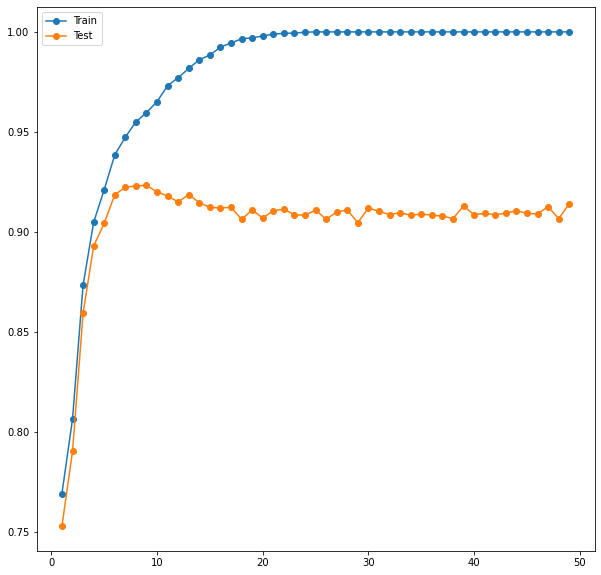

In [43]:
# plot of train and test scores vs tree depth
pyplot.figure(figsize=(10,10))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()